In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import warnings as warn
from sklearn.metrics import mean_squared_error
from sklearn import datasets
warn.filterwarnings("ignore")

# Задание 1

In [2]:
!ls|grep titanic.csv

titanic.csv


In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S


In [5]:
df_new = df[['Pclass','Fare','Age','Sex','Survived']].dropna()

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Fare      714 non-null    float64
 2   Age       714 non-null    float64
 3   Sex       714 non-null    object 
 4   Survived  714 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 33.5+ KB


In [7]:
X = df_new.drop('Survived',axis=1)
y = df_new[['Survived']]

In [8]:
X.Sex = preprocessing.LabelEncoder().fit_transform(X.Sex)

In [9]:
X.sample(2)

,Pclass,Fare,Age,Sex
23,1,35.500,28.0,1
2,3,7.925,26.0,0


In [10]:
model = DecisionTreeClassifier(random_state=100)
model.fit(X,y)

DecisionTreeClassifier(random_state=100)

In [11]:
feature_importance = model.feature_importances_
diction = dict(zip(X.columns, feature_importance))
sorted_importances = sorted(X.columns, key=lambda x: diction[x], reverse=True)

In [12]:
sorted_importances[:2]

['Sex', 'Fare']

# Задание 2

In [13]:
df = pd.read_csv('wine.csv',header=None)

In [14]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185


In [15]:
y = df[[0]]
X = df.drop(0,axis=1)

In [16]:
kf = KFold(n_splits=10, random_state=100, shuffle=True)

In [17]:
%%time
for train, test in tqdm(kf.split(X)):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

10it [00:00, 182.17it/s]

0.6111111111111112
0.6666666666666666
0.6666666666666666
0.8333333333333334
0.6111111111111112
0.5555555555555556
0.6111111111111112
1.0
0.5294117647058824
0.7647058823529411
CPU times: total: 46.9 ms
Wall time: 58.9 ms


In [18]:
cross_val_score(KNeighborsClassifier(),X,y,cv=kf,scoring='accuracy',n_jobs=-1).mean()

0.6849673202614379

In [19]:
def obj(X,y,k,scale = False):
    X_new = preprocessing.scale(X) if scale else X
    model = KNeighborsClassifier(n_neighbors=k)
    pr = cross_val_score(model,X_new,y,cv=kf,scoring='accuracy',n_jobs=-1).mean()
    return pr

In [20]:
print(max(map(lambda x: (x,obj(X,y,x)),range(1,101)),key = lambda x: x[1]))
print(max(map(lambda x: (x,obj(X,y,x,scale = True)),range(1,101)),key = lambda x: x[1]))

(1, 0.7696078431372549)
(31, 0.9833333333333334)


# Задание 3

In [21]:
X, y = datasets.load_boston(return_X_y=True)
kf = KFold(n_splits=10, random_state=100, shuffle=True)
X = preprocessing.scale(X)

In [22]:
def obj(X,y,p):
    # p - это параметр Минковского
    model = KNeighborsRegressor(n_neighbors=6, weights='distance',p=p,n_jobs=-1)
    return -cross_val_score(model,X,y,cv=kf,scoring='neg_mean_squared_error',n_jobs=-1).mean()

In [23]:
print(min(map(lambda x: (x,obj(X,y,x)),range(1,21)),key = lambda x: x[1]))

(1, 15.845902504561568)


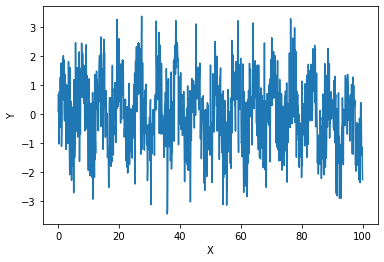

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 1000)

y = np.sin(x) + np.random.normal(0, 1, size=1000)

plt.plot(x, y)
x = x.reshape(len(x),1)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
dt = DecisionTreeRegressor(random_state=0, max_depth=100)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mean_squared_error(y_pred,y_test)

2.1991254582970727

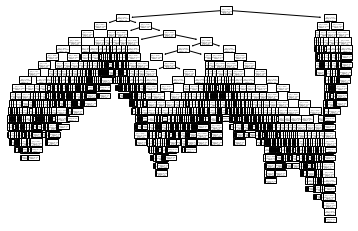

In [57]:
plot_tree(dt)
print()

In [42]:
path = dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

In [59]:
clfs = []
metric = []
for ccp_alpha in ccp_alphas:
    dt.ccp_alpha = ccp_alpha
    dt.fit(x_train, y_train)
    clfs.append(dt)
    y_pred = dt.predict(x_test)
    metric.append(mean_squared_error(y_pred,y_test))
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04351021712583347


In [54]:
t = range(len(metric))

1.235646659015524